<a href="https://colab.research.google.com/github/Prithivi1515/Demo/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

Theoretical Questions


1. What is Logistic Regression, and how does it differ from Linear Regression?


Logistic Regression is a classification algorithm that predicts probabilities using a sigmoid function. Unlike Linear Regression (which predicts continuous values), it outputs values between 0 and 1 for binary classification.

2. What is the mathematical equation of Logistic Regression?


P(y=1)= 1/
1+e
−(β
0
​
 +β
1
​
 X
1
​
 +⋯+β
n
​
 X
n
​
 )



3. Why do we use the Sigmoid function in Logistic Regression?


The sigmoid function maps real numbers to [0,1], enabling probability interpretation and ensuring differentiability for optimization.



4. What is the cost function of Logistic Regression?


Log Loss (Cross-Entropy Loss):
−
1/
m
∑
i
=
1
m
[
y
i
log
⁡
(
p
i
)
+
(
1
−
y
i
)
log
⁡
(
1
−
p
i
)
]

5. What is Regularization in Logistic Regression? Why is it needed?


Regularization (L1/L2) adds penalty terms to prevent overfitting by controlling model complexity.



6. Explain the difference between Lasso, Ridge, and Elastic Net regression.



Lasso (L1): Adds absolute coefficient penalties; can zero out features.

Ridge (L2): Adds squared coefficient penalties; shrinks coefficients.

Elastic Net: Combines L1 and L2 penalties.

7. When should we use Elastic Net instead of Lasso or Ridge?


When features are correlated or both feature selection and shrinkage are needed.



8. What is the impact of the regularization parameter (λ) in Logistic Regression?


Higher λ increases regularization strength, reducing overfitting but risking underfitting.



9. Key assumptions of Logistic Regression?



Binary outcome.

Independent observations.

No severe multicollinearity.

Linearity between features and log-odds.

10. Alternatives to Logistic Regression for classification tasks?


SVM, Decision Trees, Random Forests, K-NN, Naive Bayes.



11. Classification Evaluation Metrics?


Accuracy, Precision, Recall, F1-Score, ROC-AUC, Confusion Matrix.



12. How does class imbalance affect Logistic Regression?


Biases the model toward the majority class. Mitigate with class weights or resampling.



13. Hyperparameter Tuning in Logistic Regression?


Optimizing parameters like C (inverse of λ), penalty, and solver.



14. Different solvers in Logistic Regression? Which one should be used?



liblinear (small datasets).

saga (large datasets).

lbfgs (multiclass).

15. How is Logistic Regression extended for multiclass classification?


One-vs-Rest (OvR) or Softmax (multinomial regression).



16. Advantages and Disadvantages of Logistic Regression?



Pros: Simple, interpretable, outputs probabilities.

Cons: Assumes linearity, struggles with non-linear data.

17. Use cases of Logistic Regression?


Spam detection, credit risk assessment, medical diagnosis.



18. Difference between Softmax Regression and Logistic Regression?


Softmax handles multiclass directly; Logistic is for binary classification.



19. Choosing OvR vs Softmax?


Use OvR for non-exclusive classes; Softmax for mutually exclusive multiclass.



20. How to interpret coefficients in Logistic Regression?


Coefficients represent log-odds change. Exponentiate for odds ratios.



Practical Questions

1. Basic Logistic Regression:


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.98


2. L1 Regularization (Lasso):

In [2]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print(f"L1 Accuracy: {model.score(X_test, y_test):.2f}")

L1 Accuracy: 0.96


3. L2 Regularization (Ridge):

In [3]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
print(f"L2 Accuracy: {model.score(X_test, y_test):.2f}")
print("Coefficients:", model.coef_)

L2 Accuracy: 0.98
Coefficients: [[-0.37852322  0.86951232 -2.26556023 -0.9703293 ]
 [ 0.4541088  -0.33342475 -0.15068292 -0.7236711 ]
 [-0.07558558 -0.53608756  2.41624315  1.6940004 ]]


4. Elastic Net Regularization:

In [4]:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)
print(f"ElasticNet Accuracy: {model.score(X_test, y_test):.2f}")

ElasticNet Accuracy: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5. Multiclass Classification (OvR):

In [5]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
print(f"OvR Accuracy: {model.score(X_test, y_test):.2f}")

OvR Accuracy: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


6. GridSearchCV for Hyperparameter Tuning:

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best Params: {grid.best_params_}, Accuracy: {grid.best_score_:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Params: {'C': 10, 'penalty': 'l1'}, Accuracy: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


7. Stratified K-Fold Cross-Validation:

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = LogisticRegression()
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skf)
print(f"Average Accuracy: {scores.mean():.2f}")

Average Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8. Load CSV and Evaluate:

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from sklearn
iris = load_iris()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column to the dataframe
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())

# Features (all columns except the target)
X = df[iris.feature_names]

# Target (the last column)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 100.00%


9. RandomizedSearchCV for Hyperparameter Tuning


In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column to the dataframe
df['target'] = iris.target

# Features (all columns except the target)
X = df[iris.feature_names]

# Target (the last column)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Define the hyperparameters for tuning
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],      # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy of the best model: {accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.23357214690901212}
Accuracy of the best model: 100.00%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


10. One-vs-One (OvO) Multiclass Logistic Regression


In [12]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = OneVsOneClassifier(LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"OvO Accuracy: {accuracy_score(y_test, y_pred):.2f}")

OvO Accuracy: 0.96


11. Confusion Matrix for Binary Classification

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


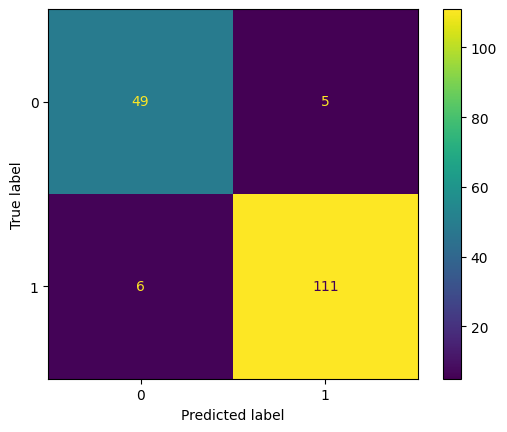

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

12. Precision, Recall, and F1-Score

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

Precision: 0.89
Recall: 0.97
F1-Score: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


13. Class Weights for Imbalanced Data

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy with Class Weights: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with Class Weights: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14. Titanic Dataset with Missing Values

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Titanic dataset using seaborn
df = sns.load_dataset('titanic')

# Show the first few rows of the dataset
print(df.head())

# Select the relevant columns
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']]

# Encode 'sex' column: male -> 0, female -> 1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Handle missing values in the 'age' column using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['age']] = imputer.fit_transform(df[['age']])

# Define the features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Accuracy: 80.97%


15. Feature Scaling (Standardization)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"Accuracy with Scaling: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with Scaling: 0.96


16. ROC-AUC Score

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.2f}")

ROC-AUC Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


17. Custom Learning Rate (C=0.5)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy with C=0.5: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with C=0.5: 0.98


18. Feature Importance from Coefficients

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd

X, y = load_iris(return_X_y=True)
model = LogisticRegression()
model.fit(X, y)
importance = pd.DataFrame({'Feature': range(X.shape[1]), 'Coefficient': model.coef_[0]})
print(importance.sort_values(by='Coefficient', ascending=False))

   Feature  Coefficient
1        1     0.966380
0        0    -0.418274
3        3    -1.084132
2        2    -2.520825


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


19. Cohen’s Kappa Score

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Cohen’s Kappa: {cohen_kappa_score(y_test, y_pred):.2f}")

Cohen’s Kappa: 0.93


20. Precision-Recall Curve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


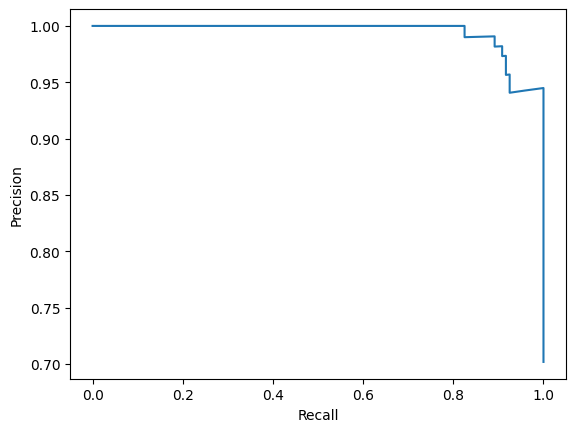

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

21. Compare Solvers (liblinear, saga, lbfgs)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with {solver}: {accuracy_score(y_test, y_pred):.2f}")

Accuracy with liblinear: 0.96
Accuracy with saga: 0.96
Accuracy with lbfgs: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


22. Matthews Correlation Coefficient (MCC)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.2f}")

MCC: 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


23. Impact of Feature Scaling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Without Scaling
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy without Scaling: {accuracy_score(y_test, y_pred):.2f}")
# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"Accuracy with Scaling: {accuracy_score(y_test, y_pred):.2f}")

Accuracy without Scaling: 0.98
Accuracy with Scaling: 0.98


24. Optimal C using Cross-Validation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

X, y = load_iris(return_X_y=True)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X, y)
print(f"Optimal C: {grid.best_params_['C']}, Best Accuracy: {grid.best_score_:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal C: 10, Best Accuracy: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

25. Save and Load Model using Joblib

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import joblib

X, y = load_iris(return_X_y=True)
model = LogisticRegression()
model.fit(X, y)
joblib.dump(model, 'logistic_model.pkl')
loaded_model = joblib.load('logistic_model.pkl')
print(f"Model Accuracy: {loaded_model.score(X, y):.2f}")

Model Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
